# Understanding Heart Function through the Four-Chamber Electromechanics Model

## Introduction

Welcome to our exploration into the fascinating world of heart electromechanics! Today, we'll dive into how scientists use advanced computer models to understand the heart's function, from the cellular level up to the whole organ. This journey is made possible through a study that employs a technique known as Gaussian Processes Emulators (GPEs) to analyze a four-chamber heart model.

## Background

The heart is an incredible organ, pumping blood throughout our body every second of our lives. Its function is complex, beginning at the microscopic level with cells that create electrical signals, and culminating in the coordinated contraction of the heart's four chambers that propel blood to our lungs and the rest of the body.

Researchers have developed a digital twin of the heart, simulating its electromechanics to predict how changes at the cellular level can affect overall heart function. This model considers 117 different parameters, from how cells react to electrical signals to the heart's structure and how it interacts with the circulatory system.

## The Study

In the paper "Cell to Whole Organ Global Sensitivity Analysis on a Four-chamber Heart Electromechanics Model Using Gaussian Processes Emulators," scientists have taken a significant step forward. They've used GPEs to simplify the model from 117 to 45 critical parameters, making it easier and faster to predict heart function under various conditions. This process helps build patient-specific models, potentially guiding personalized treatment strategies.

## Our Task

We'll use the training datasets from this study, contained in two files: `parameters.csv` and `outputs.csv`. These files represent the inputs and outputs of simulations run with the four-chamber electromechanics model. Our goal is to understand how changes in the model's parameters can affect outputs like heart volume or in our case, pressure, which are vital for cardiac function. By leveraging the `AutoEmulate` package, we'll gain insights into how parameters influence such key outputs related to heart function.

---

## Setup

First, let's import the necessary libraries and load our datasets:

In [3]:
import pandas as pd
import numpy as np
from autoemulate.compare import AutoEmulate

# Load datasets
params_df = pd.read_csv('../../data/cardiac4/raw/parameters.csv')
outputs_df = pd.read_csv('../../data/cardiac4/raw/outputs.csv')

## Data Preparation

With the data loaded, we need to prepare it for analysis with AutoEmulate. This involves selecting our input parameters and target outputs. For this example, let's focus on a specific output, say "EDP,lv" (End-Diastolic Pressure in the left ventricle), to demonstrate the process. You can repeat the process for other outputs of interest.

In [4]:
X = params_df.values
y = outputs_df['EDP,lv'].values

## AutoEmulate Analysis

Now, we're set to use AutoEmulate to understand how changes in the heart's parameters affect its end-diastolic pressure, a crucial metric for cardiac function.

In [5]:
# Initialize AutoEmulate
ae = AutoEmulate()

# Setup the emulator with our data
ae.setup(X, y)

# Compare different emulator models to find the best fit
ae.compare()

# Display the comparison results
ae.print_results()

autoemulate - Cross-validating SecondOrderPolynomial...
autoemulate - Parameters: {'degree': 2}
autoemulate - Cross-validating RBF...
autoemulate - Parameters: {'degree': 1, 'epsilon': 1.0, 'kernel': 'thin_plate_spline', 'smoothing': 0.0}
autoemulate - Cross-validating RandomForest...
autoemulate - Parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': False, 'random_state': None}
autoemulate - Cross-validating GradientBoosting...
autoemulate - Parameters: {'ccp_alpha': 0.0, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0}
autoemulate - Cross-validating GaussianProcessSk...
autoemulate - Parameters: {'alpha': 1e-10, 'copy_X_train': True, 'kernel__length_scale': 1.0, 'kerne

Average scores across all models:
                   model        r2      rmse
0                    RBF  0.857782  0.593734
1       GradientBoosting  0.765407  0.774768
2  SupportVectorMachines  0.693183  0.886448
3            NeuralNetSk  0.677224  0.899400
4                XGBoost  0.662325  0.924388
5           RandomForest  0.647733  0.925182
6      GaussianProcessSk  0.323722  1.198761
7  SecondOrderPolynomial  0.029824  1.553573
8         NeuralNetTorch -9.439610  5.123888


## Model Selection and Evaluation

Based on the comparison, we select the best-performing model. Then, we save this model for future use, ensuring we can quickly predict the heart's behavior under new conditions.

In [6]:
# Save the best model
ae.save_model("best_edp_lv_model")

# Load the model for emulation
best_model = ae.load_model("best_edp_lv_model")

# Predict using the best model
predictions = best_model.predict(X)

# Optionally, compare predictions to actual values to evaluate performance

## Insights and Visualization

To make our findings accessible, we visualize the impact of key parameters on the EDP,lv. This step is crucial for interpreting the model's results and providing actionable insights.

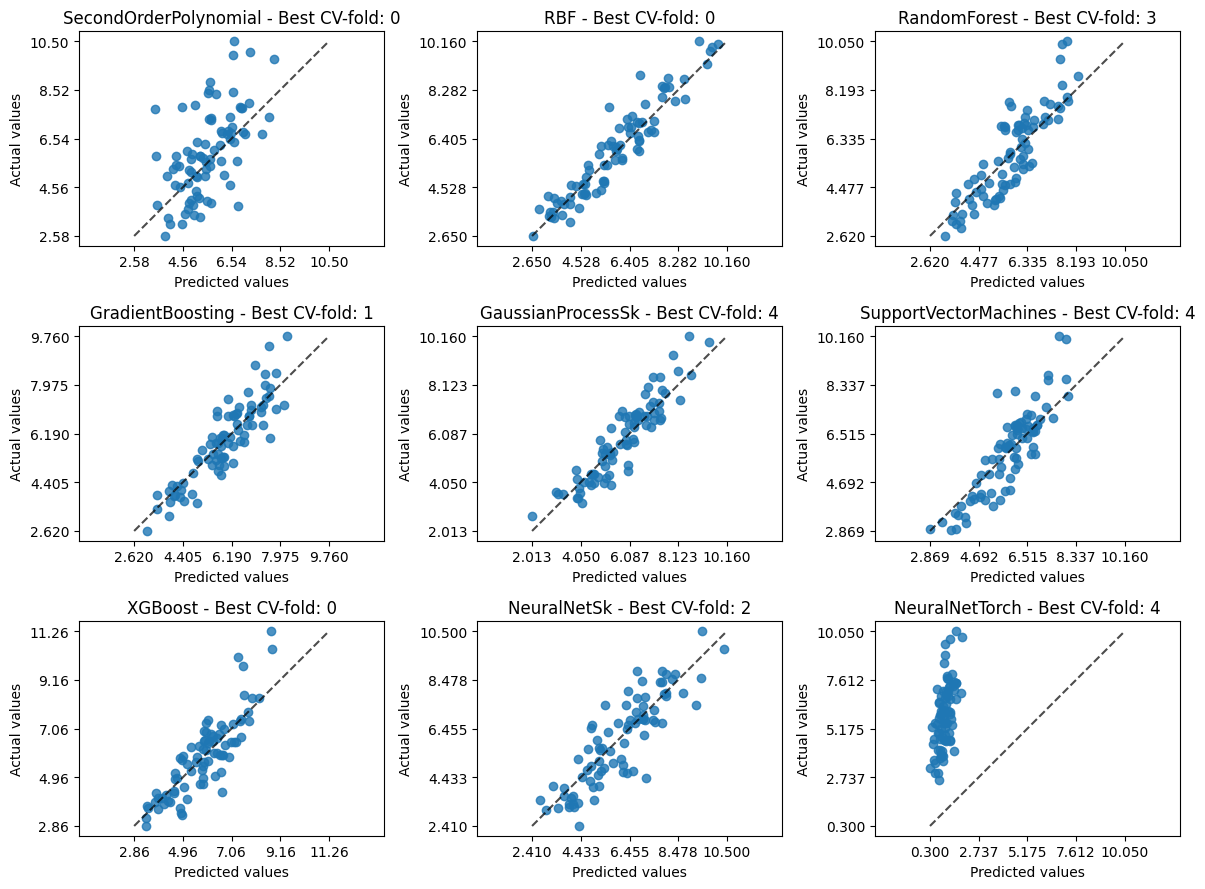

In [7]:
ae.plot_results()

## Conclusion

Through this analysis, we've used `AutoEmulate` to bridge the gap between complex cardiac function simulations and actionable insights. By identifying the most influential parameters on heart function, researchers and clinicians can prioritize areas for further study or intervention, paving the way for personalized medicine approaches in cardiology.

---

Next, you can try to extend this analysis on your own in several ways:

1. Repeat the analysis for other vital metrics, such as peak systolic pressure or stroke volume.
2. Incorporate additional machine learning techniques to refine predictions and understand parameter interactions.
3. Explore the potential for integrating this analysis into the development of patient-specific digital twins for personalized treatment planning.